# 3. Feature Engineering and data preparation
* Now we have performed EDA and done preliminary cleaning of the data we can now start preparing the data ready for usage by our chosen algorithm
         
* Going to restructure data to be supervised and create some features which may be useful in aiding model to pick up the underlying relationships
   
# Imports


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
from datetime import datetime

# pd.display optioons

In [9]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# loading data

In [10]:
df_energy = pd.read_pickle("../Data/Preprocessed_Data/consumption_clustered.pkl")
df_energy

,meter_id,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,...,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31,labels
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7410,5.48250,7.224,4.951,4.19650,3.4420,3.509,4.6750,6.131,4.962,3.336,4.318,3.561,4.279,4.030,5.397,5.1075,4.818,3.931,4.2170,4.503,4.8160,5.129,5.395,0
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.4690,24.09950,24.730,24.597,22.32650,20.0560,22.546,22.3330,23.353,22.774,20.229,21.218,15.419,13.475,13.101,14.327,14.6315,14.936,16.174,20.3960,24.618,19.8925,15.167,11.751,1
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0265,16.22475,12.423,18.379,15.85025,13.3215,13.821,14.2175,16.712,12.364,16.102,18.601,10.385,10.917,10.201,7.320,7.3520,7.384,14.425,16.0650,17.705,13.3355,8.966,4.633,4
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.3150,21.49350,19.672,21.023,20.35450,19.6860,23.435,18.7330,22.249,20.755,19.730,21.135,16.526,12.677,14.833,12.477,11.7255,10.974,19.646,21.8195,23.993,19.9170,15.841,14.452,1
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.3880,41.99750,48.607,54.760,48.73150,42.7030,35.045,38.6640,36.790,29.009,42.716,29.052,25.444,28.234,39.440,35.538,21.9445,8.351,9.957,17.9140,25.871,36.0725,46.274,16.901,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.317,2.301,2.352,2.516,2.229,2.354,2.397,2.397,2.269,2.3040,2.339,2.212,2.456,2.229,2.503,2.207,2.469,2.266,2.321,2.262,2.286,2.384,2.319,2.289,...,9.9760,10.30550,10.635,10.650,10.39950,10.1490,10.112,10.6320,10.566,10.732,10.615,10.386,9.936,9.625,9.390,9.231,9.2235,9.216,9.336,9.6840,10.032,9.8945,9.757,9.480,4
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,14.437,16.274,7.031,17.018,17.603,15.005,8.987,8.490,10.136,10.3010,10.466,8.177,11.929,8.261,12.369,14.352,14.058,10.472,17.396,9.879,21.971,12.708,15.327,8.309,...,5.8620,6.81600,7.770,5.091,5.60000,6.1090,5.056,3.9720,3.458,7.793,9.837,8.697,5.079,6.031,4.141,2.828,3.8230,4.818,3.357,8.1315,12.906,8.0140,3.122,3.401,0
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,7.824,7.517,5.398,6.788,7.360,6.898,7.321,8.042,8.207,6.8355,5.464,7.545,6.432,6.001,5.558,6.391,6.066,6.443,6.675,7.363,7.269,7.183,7.102,6.449,...,7.2410,6.46800,5.695,8.143,7.56800,6.9930,6.451,7.6290,6.880,5.960,6.231,5.748,5.259,5.258,6.767,5.919,5.9980,6.077,7.761,6.6080,5.455,5.5670,5.679,8.148,0
3246,0x47218b46abb2fcaade487a211911406dc6e13730,23.965,28.689,27.664,29.229,29.548,27.909,26.923,21.277,23.452,24.6880,25.924,26.834,30.346,30.367,26.135,26.842,25.588,30.267,28.921,27.530,28.424,28.961,29.346,28.640,...,28.7260,29.28500,29.844,31.899,30.96900,30.0390,30.470,30.0440,28.617,31.578,31.481,32.123,29.524,22.586,20.747,19.979,20.1925,20.406,23.668,27.7900,31.912,29.1125,26.313,24.201,2


In [11]:
df_addInfo = pd.read_pickle("../Data/Preprocessed_Data/addInfo_knn.pkl")
df_addInfo

,meter_id,num_bedrooms,dwelling_type,dwelling_type_detached_house,dwelling_type_flat,dwelling_type_semi_detached_house,dwelling_type_terraced_house
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,3.0,semi_detached_house,0.0,0.0,1.0,0.0
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,2.0,terraced_house,0.0,0.0,0.0,1.0
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,3.0,semi_detached_house,0.0,0.0,1.0,0.0
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,4.0,detached_house,1.0,0.0,0.0,0.0
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,3.0,semi_detached_house,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
3243,0xdf6a54b92985398af03423426e744c6d40ee8c69,4.0,semi_detached_house,0.0,0.0,1.0,0.0
3244,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,3.0,detached_house,1.0,0.0,0.0,0.0
3245,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,3.0,semi_detached_house,0.0,0.0,1.0,0.0
3246,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,3.0,semi_detached_house,0.0,0.0,1.0,0.0


In [12]:
# joining based on meter_id to assign labels to the original dataset (with all meter readings)
df_energy_addInfo = pd.merge(df_energy, df_addInfo, on="meter_id",how="inner")
df_energy_addInfo

,meter_id,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,...,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31,labels,num_bedrooms,dwelling_type,dwelling_type_detached_house,dwelling_type_flat,dwelling_type_semi_detached_house,dwelling_type_terraced_house
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.509,4.6750,6.131,4.962,3.336,4.318,3.561,4.279,4.030,5.397,5.1075,4.818,3.931,4.2170,4.503,4.8160,5.129,5.395,0,2.0,terraced_house,0.0,0.0,0.0,1.0
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.546,22.3330,23.353,22.774,20.229,21.218,15.419,13.475,13.101,14.327,14.6315,14.936,16.174,20.3960,24.618,19.8925,15.167,11.751,1,4.0,detached_house,1.0,0.0,0.0,0.0
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.821,14.2175,16.712,12.364,16.102,18.601,10.385,10.917,10.201,7.320,7.3520,7.384,14.425,16.0650,17.705,13.3355,8.966,4.633,4,3.0,semi_detached_house,0.0,0.0,1.0,0.0
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.435,18.7330,22.249,20.755,19.730,21.135,16.526,12.677,14.833,12.477,11.7255,10.974,19.646,21.8195,23.993,19.9170,15.841,14.452,1,3.0,semi_detached_house,0.0,0.0,1.0,0.0
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.045,38.6640,36.790,29.009,42.716,29.052,25.444,28.234,39.440,35.538,21.9445,8.351,9.957,17.9140,25.871,36.0725,46.274,16.901,3,4.0,detached_house,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.317,2.301,2.352,2.516,2.229,2.354,2.397,2.397,2.269,2.3040,2.339,2.212,2.456,2.229,2.503,2.207,2.469,2.266,2.321,2.262,2.286,2.384,2.319,2.289,...,10.112,10.6320,10.566,10.732,10.615,10.386,9.936,9.625,9.390,9.231,9.2235,9.216,9.336,9.6840,10.032,9.8945,9.757,9.480,4,3.0,semi_detached_house,0.0,0.0,1.0,0.0
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,14.437,16.274,7.031,17.018,17.603,15.005,8.987,8.490,10.136,10.3010,10.466,8.177,11.929,8.261,12.369,14.352,14.058,10.472,17.396,9.879,21.971,12.708,15.327,8.309,...,5.056,3.9720,3.458,7.793,9.837,8.697,5.079,6.031,4.141,2.828,3.8230,4.818,3.357,8.1315,12.906,8.0140,3.122,3.401,0,2.0,terraced_house,0.0,0.0,0.0,1.0
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,7.824,7.517,5.398,6.788,7.360,6.898,7.321,8.042,8.207,6.8355,5.464,7.545,6.432,6.001,5.558,6.391,6.066,6.443,6.675,7.363,7.269,7.183,7.102,6.449,...,6.451,7.6290,6.880,5.960,6.231,5.748,5.259,5.258,6.767,5.919,5.9980,6.077,7.761,6.6080,5.455,5.5670,5.679,8.148,0,2.0,terraced_house,0.0,0.0,0.0,1.0
3246,0x47218b46abb2fcaade487a211911406dc6e13730,23.965,28.689,27.664,29.229,29.548,27.909,26.923,21.277,23.452,24.6880,25.924,26.834,30.346,30.367,26.135,26.842,25.588,30.267,28.921,27.530,28.424,28.961,29.346,28.640,...,30.470,30.0440,28.617,31.578,31.481,32.123,29.524,22.586,20.747,19.979,20.1925,20.406,23.668,27.7900,31.912,29.1125,26.313,24.201,2,3.0,detached_house,1.0,0.0,0.0,0.0


# Training set 

## Converting to a supervised learning problem

* Transforming data from a time series structure into a supervised learning structure
    * restrecturing dataframe with 9 columns, 8 inputs, 1 output (meter_reading)


In [13]:
def to_supervised(df_original, dataset_type):

    #defining the new structure for the dataframe
    df_super = pd.DataFrame(columns=["meter_id","date","energy_cluster","num_bedrooms","dwelling_type","detached","flat","semi_detached","terraced","meter_reading"])

    if dataset_type=="train":
        #iteratively populating the supering set
        date = pd.date_range(datetime(2017, 1, 1), datetime(2017, 12, 31))#outside of loop as doesn't need to be recaculated
    else:
        date = pd.date_range(datetime(2018, 1, 1), datetime(2018, 12, 31))#outside of loop as doesn't need to be recaculated
        
    #for each row in the dataframe
    for row_id in tqdm(range(len(df_original))):

        #getting relevant values for this row
        row = df_original.iloc[row_id]

        ### adding the various meta_data ###
        meter_id = row.meter_id
        energy_cluster = row.labels
        num_bedrooms = row.num_bedrooms
        detached = row.dwelling_type_detached_house
        flat = row.dwelling_type_flat
        semi_detached = row.dwelling_type_semi_detached_house
        terraced = row.dwelling_type_terraced_house
        dwelling_type = row.dwelling_type
        
        if dataset_type=="train":
            meter_reading = []
            #iterating through all the dates for this meter (skipping meter_id column up to len row - 7 metadata columns)
            for reading_index in range (1,len(row)-7):
                meter_reading.append(row[reading_index])

        #formatting this row into dataframe with timeseries patterns over rows instead of columns
        df_meter = pd.DataFrame(columns=["meter_id","date","energy_cluster","num_bedrooms","dwelling_type","detached","flat","semi_detached","terraced", "meter_reading"])

        df_meter["date"]=date #needs to be first as it determines length of columns
        df_meter["meter_id"]=meter_id
        df_meter["energy_cluster"]=energy_cluster
        df_meter["num_bedrooms"]=num_bedrooms
        df_meter["detached"]=detached
        df_meter["flat"]=flat
        df_meter["semi_detached"]=semi_detached
        df_meter["terraced"]=terraced
        df_meter["dwelling_type"]=dwelling_type
        if dataset_type=="train":
            df_meter["meter_reading"]=meter_reading

        #finished converting this row so adding it to the dataframe
        df_super = pd.concat([df_super, df_meter],axis=0).reset_index(drop=True)

    return df_super

In [14]:
#number of previous steps we are using in our predictions
df_energy_train=to_supervised(df_energy_addInfo, "train")
df_energy_train

  0%|          | 0/3248 [00:00<?, ?it/s]

,meter_id,date,energy_cluster,num_bedrooms,dwelling_type,detached,flat,semi_detached,terraced,meter_reading
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-01-01,0,2.0,terraced_house,0.0,0.0,0.0,1.0,NaN
1,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-01-02,0,2.0,terraced_house,0.0,0.0,0.0,1.0,NaN
2,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-01-03,0,2.0,terraced_house,0.0,0.0,0.0,1.0,NaN
3,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-01-04,0,2.0,terraced_house,0.0,0.0,0.0,1.0,NaN
4,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-01-05,0,2.0,terraced_house,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1185515,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-27,2,3.0,detached_house,1.0,0.0,0.0,0.0,18.7585
1185516,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-28,2,3.0,detached_house,1.0,0.0,0.0,0.0,21.0110
1185517,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-29,2,3.0,detached_house,1.0,0.0,0.0,0.0,19.2040
1185518,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-30,2,3.0,detached_house,1.0,0.0,0.0,0.0,17.3970


## Feature engineering 
#### Dummy variables for the date
* Cyclically encoded
    * As if ordinally encoded it will imply that January (0) and December (12) are far from each other 
    


* My thinking was
    * Cyclically encode day of year as 1st Jan is close to 31st Dec
    * Cyclically encode month for the same reason
    * Not cyclically encoded day of week or month as they exist within the month and there is an ordinal relationship within that month
    * Extra dummy variable for specifying if it's a weekend or not such that it can more easily facilitate learning it


* Will experiment with different combinations of these in the RNN to see which performs the best
    * Eg does the dummy variable for saying it's a weekend or not improve performance or is it better to just use day_of_week?
        * etc.

# Inspecting number of missing meters
* 10 meters are missing so just going to use the mean for 1 day of these so their id exists in the model so it can weigh it appropriately as apposed to the meter_id not existing and it being out of scope

In [15]:
#checking the number of unique meter_id's in this
df_energy_train["meter_id"].nunique()

3248

In [16]:
# removing rows containing nans as the model won't be able to use them
df_energy_train_no_nan = df_energy_train.dropna(axis=0).reset_index(drop=True)
df_energy_train_no_nan

,meter_id,date,energy_cluster,num_bedrooms,dwelling_type,detached,flat,semi_detached,terraced,meter_reading
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-12-03,0,2.0,terraced_house,0.0,0.0,0.0,1.0,3.5170
1,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-12-04,0,2.0,terraced_house,0.0,0.0,0.0,1.0,2.9330
2,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-12-05,0,2.0,terraced_house,0.0,0.0,0.0,1.0,3.0850
3,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-12-06,0,2.0,terraced_house,0.0,0.0,0.0,1.0,3.2370
4,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2017-12-07,0,2.0,terraced_house,0.0,0.0,0.0,1.0,4.4710
...,...,...,...,...,...,...,...,...,...,...
640294,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-27,2,3.0,detached_house,1.0,0.0,0.0,0.0,18.7585
640295,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-28,2,3.0,detached_house,1.0,0.0,0.0,0.0,21.0110
640296,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-29,2,3.0,detached_house,1.0,0.0,0.0,0.0,19.2040
640297,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-30,2,3.0,detached_house,1.0,0.0,0.0,0.0,17.3970


In [17]:
#checking the number of unique meter_id's in this
df_energy_train_no_nan["meter_id"].nunique()

3238

In [18]:
#what id's are missing
missing_ids = np.setdiff1d(df_energy_train["meter_id"],df_energy_train_no_nan["meter_id"],)
missing_ids

array(['0x2ce3d582a1316db5bcfe405cbd6070268944778e',
       '0x391e6c2169c27de797ccbdf2d623365da28a6d3d',
       '0x423fa805ddb0cba9bdb4460f9a78540287eefd0e',
       '0x795fa14a925f90f11752454da39988048db6e042',
       '0x800c9648a84c44cf1a1b0a0ada6283495a69fe8b',
       '0x81fa8eddb2b09393d3719984ca5520cb50f45efd',
       '0xab6f16ec971923ef1acd4693705b28bcfe7a7115',
       '0xc73b4d676b98a29a4c3c4ed78c8f1d208b96fa11',
       '0xe2154c841409bba5b83d208c83c33938d1a02474',
       '0xe41c230484378b2312fbf1fc99d289e0b51a3c52'], dtype=object)

# Feature engineering
with dummy variables

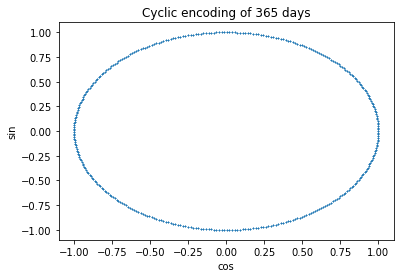

In [19]:
days = [*range(0,365)]

sin = []
for m in days:
    sin.append(np.sin(2 * np.pi * m/365.0))

cos = []
for m in days:
    cos.append(np.cos(2 * np.pi * m/365.0))
    
plt.scatter(cos,sin, s=1, marker="x")

plt.xlabel("cos")
plt.ylabel("sin")
plt.title("Cyclic encoding of 365 days")

plt.show()

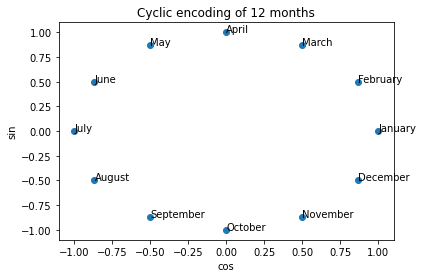

In [20]:
#plot of cyclic encoding
month = [0,1,2,3,4,5,6,7,8,9,10,11]

month_sin = []
for m in month:
    month_sin.append(np.sin(2 * np.pi * m/12.0))

month_cos = []
for m in month:
    month_cos.append(np.cos(2 * np.pi * m/12.0))

plt.scatter(month_cos,month_sin)


annotations=["January","February","March","April","May","June","July","August","September","October","November","December"]
for i, label in enumerate(annotations):
    plt.annotate(label, (month_cos[i],month_sin[i]))
plt.xlabel("cos")
plt.ylabel("sin")
plt.title("Cyclic encoding of 12 months")
plt.show()

In [21]:
#defining the new structure with the cyclically encoded date columns
df_energy_train_with_dummies = pd.DataFrame(columns=['meter_id', 'date', 'day_of_year_sin', 'day_of_year_cos', 'day_of_week', 'day_of_month', 'month_ord', 'month_sin', 'month_cos', 'is_weekend','energy_cluster', 'num_bedrooms', 'dwelling_type', 'detached',
       'flat', 'semi_detached', 'terraced',
       'meter_reading'], data=df_energy_train_no_nan)

#cyclically encoding day of year
day_of_year = df_energy_train_with_dummies["date"].dt.dayofyear.astype(int)
df_energy_train_with_dummies["day_of_year_sin"] = np.sin(2 * np.pi * day_of_year/365.0)
df_energy_train_with_dummies["day_of_year_cos"] = np.cos(2 * np.pi * day_of_year/365.0)

#cyclically encoding month
month = df_energy_train_with_dummies["date"].dt.month.astype(int)
df_energy_train_with_dummies["month_ord"] = month
df_energy_train_with_dummies["month_sin"] = np.sin(2 * np.pi * month/12.0)
df_energy_train_with_dummies["month_cos"] = np.cos(2 * np.pi * month/12.0)

#day of week not cyclically encoded as it exists within month
df_energy_train_with_dummies["day_of_week"]  = df_energy_train_with_dummies["date"].dt.dayofweek.astype(int)

#day of month not cyclically encoded as it exists within month
df_energy_train_with_dummies["day_of_month"]  = df_energy_train_with_dummies["date"].dt.day.astype(int)

#dummy variable for is_weekend
df_energy_train_with_dummies["is_weekend"]=0
df_energy_train_with_dummies.loc[df_energy_train_with_dummies.day_of_week>4, "is_weekend"] = 1

# displaying the dataframe
df_energy_train_with_dummies.tail(10)

,meter_id,date,day_of_year_sin,day_of_year_cos,day_of_week,day_of_month,month_ord,month_sin,month_cos,is_weekend,energy_cluster,num_bedrooms,dwelling_type,detached,flat,semi_detached,terraced,meter_reading
640289,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-22,-1.543088e-01,0.988023,4,22,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,14.0360
640290,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-23,-1.372788e-01,0.990532,5,23,12,-2.449294e-16,1.0,1,2,3.0,detached_house,1.0,0.0,0.0,0.0,15.9900
640291,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-24,-1.202080e-01,0.992749,6,24,12,-2.449294e-16,1.0,1,2,3.0,detached_house,1.0,0.0,0.0,0.0,15.5505
640292,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-25,-1.031017e-01,0.994671,0,25,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,15.1110
640293,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-26,-8.596480e-02,0.996298,1,26,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,16.5060
640294,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-27,-6.880243e-02,0.997630,2,27,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,18.7585
640295,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-28,-5.161967e-02,0.998667,3,28,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,21.0110
640296,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-29,-3.442161e-02,0.999407,4,29,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,19.2040
640297,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-30,-1.721336e-02,0.999852,5,30,12,-2.449294e-16,1.0,1,2,3.0,detached_house,1.0,0.0,0.0,0.0,17.3970
640298,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,2017-12-31,6.432491e-16,1.000000,6,31,12,-2.449294e-16,1.0,1,2,3.0,detached_house,1.0,0.0,0.0,0.0,15.2370


# encoding the ID
* Encoding via binary encoding
* One hot encoding has a linear growth rate of n whereas binary encoding has a growth rate of log_2(n)
* Our n is 3248 so:
    * One hot encoding would add 3248 extra features
    * Binary encoding would add log_2(3248) extra features = 12

* Hence, allows us to uniquely describe the different id's with far fewer features and hence resulting in a much less sparse search space

## encoding for the whole dataset

In [44]:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['meter_id'])
binary_encoder.fit(df_energy["meter_id"])


df_energy_train_final = pd.concat([df_energy_train_with_dummies["meter_id"],binary_encoder.transform(df_energy_train_with_dummies["meter_id"]),df_energy_train_with_dummies.iloc[:,1:]],axis=1)

# if(os.path.exists("../Data/Prepared_Data/Supervised/preapared_consumption_all.pkl")==False):
#         df_energy_train_final.to_pickle("../Data/Prepared_Data/Supervised/consumption_all.pkl")
df_energy_train_final.to_pickle("../Data/Prepared_Data/Supervised/consumption_all.pkl")

C:\Users\psydm7\Anaconda3\envs\mle_tf\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [45]:
df_energy_train_final

,meter_id,meter_id_0,meter_id_1,meter_id_2,meter_id_3,meter_id_4,meter_id_5,meter_id_6,meter_id_7,meter_id_8,meter_id_9,meter_id_10,meter_id_11,meter_id_12,date,day_of_year_sin,day_of_year_cos,day_of_week,day_of_month,month_ord,month_sin,month_cos,is_weekend,energy_cluster,num_bedrooms,dwelling_type,detached,flat,semi_detached,terraced,meter_reading
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-12-03,-4.635503e-01,0.886071,6,3,12,-2.449294e-16,1.0,1,0,2.0,terraced_house,0.0,0.0,0.0,1.0,3.5170
1,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-12-04,-4.482293e-01,0.893919,0,4,12,-2.449294e-16,1.0,0,0,2.0,terraced_house,0.0,0.0,0.0,1.0,2.9330
2,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-12-05,-4.327756e-01,0.901502,1,5,12,-2.449294e-16,1.0,0,0,2.0,terraced_house,0.0,0.0,0.0,1.0,3.0850
3,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-12-06,-4.171936e-01,0.908818,2,6,12,-2.449294e-16,1.0,0,0,2.0,terraced_house,0.0,0.0,0.0,1.0,3.2370
4,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-12-07,-4.014880e-01,0.915864,3,7,12,-2.449294e-16,1.0,0,0,2.0,terraced_house,0.0,0.0,0.0,1.0,4.4710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640294,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,0,1,1,0,0,1,0,1,1,0,0,0,0,2017-12-27,-6.880243e-02,0.997630,2,27,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,18.7585
640295,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,0,1,1,0,0,1,0,1,1,0,0,0,0,2017-12-28,-5.161967e-02,0.998667,3,28,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,21.0110
640296,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,0,1,1,0,0,1,0,1,1,0,0,0,0,2017-12-29,-3.442161e-02,0.999407,4,29,12,-2.449294e-16,1.0,0,2,3.0,detached_house,1.0,0.0,0.0,0.0,19.2040
640297,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd,0,1,1,0,0,1,0,1,1,0,0,0,0,2017-12-30,-1.721336e-02,0.999852,5,30,12,-2.449294e-16,1.0,1,2,3.0,detached_house,1.0,0.0,0.0,0.0,17.3970


# Prediction set 
* making an empty prediction set we will populate
* done using same strategy as above

In [46]:
### Creating a prediction set in the same structure as df_energy_addInfo so we can reuse the same code to format it ###

# making the prediction set
df_preds = pd.DataFrame(columns=["meter_id"])
df_preds["meter_id"]=df_energy_addInfo.meter_id

#adding the date columns
for i in tqdm(pd.date_range(datetime(2018,1,1),datetime(2018,12,31),freq="D"),position=0):
    df_preds[str(i.date())]=np.nan
    
#getting the missing columns
cols_to_use = df_energy_addInfo.columns.difference(df_preds.columns)[365:] #after the 365 date columns
cols_to_use = np.concatenate((cols_to_use,["meter_id"]))

df_preds = pd.merge(df_preds, df_energy_addInfo[cols_to_use], on="meter_id",how="inner")
df_preds

  0%|          | 0/365 [00:00<?, ?it/s]

,meter_id,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20,2018-01-21,2018-01-22,2018-01-23,2018-01-24,...,2018-12-14,2018-12-15,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31,dwelling_type,dwelling_type_detached_house,dwelling_type_flat,dwelling_type_semi_detached_house,dwelling_type_terraced_house,labels,num_bedrooms
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terraced_house,0.0,0.0,0.0,1.0,0,2.0
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,detached_house,1.0,0.0,0.0,0.0,1,4.0
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,semi_detached_house,0.0,0.0,1.0,0.0,4,3.0
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,semi_detached_house,0.0,0.0,1.0,0.0,1,3.0
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,detached_house,1.0,0.0,0.0,0.0,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,semi_detached_house,0.0,0.0,1.0,0.0,4,3.0
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terraced_house,0.0,0.0,0.0,1.0,0,2.0
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terraced_house,0.0,0.0,0.0,1.0,0,2.0
3246,0x47218b46abb2fcaade487a211911406dc6e13730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,detached_house,1.0,0.0,0.0,0.0,2,3.0


In [47]:
# def pred_to_supervised(df_original):

#     #defining the new structure for the dataframe
#     df_energy_pred = pd.DataFrame(columns=["meter_id","date","energy_cluster","num_bedrooms","dwelling_type","detached","flat","semi_detached","terraced","meter_reading"])

#     #iteratively populating the training set
#     date = pd.date_range(datetime(2018, 1, 1), datetime(2018, 12, 31))#outside of loop as doesn't need to be recaculated

#     #for each row in the dataframe
#     for row_id in tqdm(range(len(df_original))):

#         #getting relevant values for this row
#         row = df_original.iloc[row_id]

#         ### adding the various meta_data ###
#         meter_id = row.meter_id
#         energy_cluster = row.labels
#         num_bedrooms = row.num_bedrooms
#         detached = row.dwelling_type_detached_house
#         flat = row.dwelling_type_flat
#         semi_detached = row.dwelling_type_semi_detached_house
#         terraced = row.dwelling_type_terraced_house
#         dwelling_type = row.dwelling_type

#         #formatting this row into dataframe with timeseries patterns over rows instead of columns
#         df_meter = pd.DataFrame(columns=["meter_id","date","energy_cluster","num_bedrooms","dwelling_type","detached","flat","semi_detached","terraced"])

#         df_meter["date"]=date #needs to be first as it determines length of columns
#         df_meter["meter_id"]=meter_id
#         df_meter["energy_cluster"]=energy_cluster
#         df_meter["num_bedrooms"]=num_bedrooms
#         df_meter["detached"]=detached
#         df_meter["flat"]=flat
#         df_meter["semi_detached"]=semi_detached
#         df_meter["terraced"]=terraced
#         df_meter["dwelling_type"]=dwelling_type

#         #finished converting this row so adding it to the dataframe
#         df_energy_pred = pd.concat([df_energy_pred, df_meter],axis=0).reset_index(drop=True)

#     return df_energy_pred

In [ ]:
### Turning into a supervised problem ###

#number of previous steps we are using in our predictions
df_preds_super=to_supervised(df_preds, "prediction")
df_preds_super

  0%|          | 0/3248 [00:00<?, ?it/s]

In [ ]:
### doing the date based dummies ###

#defining the new structure with the cyclically encoded date columns
df_preds_dummies = pd.DataFrame(columns=['meter_id', 'date', 'day_of_year_sin', 'day_of_year_cos', 'day_of_week', 'day_of_month', 'month_ord','month_sin', 'month_cos', 'is_weekend','energy_cluster', 'num_bedrooms', 'dwelling_type', 'detached',
       'flat', 'semi_detached', 'terraced',
       'meter_reading'], data=df_preds_super)

#cyclically encoding day of year
day_of_year = df_preds_dummies["date"].dt.dayofyear.astype(int)
df_preds_dummies["day_of_year_sin"] = np.sin(2 * np.pi * day_of_year/364.0)
df_preds_dummies["day_of_year_cos"] = np.cos(2 * np.pi * day_of_year/364.0)

#cyclically encoding month
month = df_preds_dummies["date"].dt.month.astype(int)
df_preds_dummies["month_ord"] = month
df_preds_dummies["month_sin"] = np.sin(2 * np.pi * month/11.0)
df_preds_dummies["month_cos"] = np.cos(2 * np.pi * month/11.0)

#day of week not cyclically encoded as it exists within month
df_preds_dummies["day_of_week"]  = df_preds_dummies["date"].dt.dayofweek.astype(int)

#day of month not cyclically encoded as it exists within month
df_preds_dummies["day_of_month"]  = df_preds_dummies["date"].dt.day.astype(int)

#dummy variable for is_weekend
df_preds_dummies["is_weekend"]=0
df_preds_dummies.loc[df_preds_dummies.day_of_week>4, "is_weekend"] = 1

# displaying the dataframe
df_preds_dummies

# encoding the ID

## encoding for the whole dataset

In [ ]:
df_preds_dummies

In [ ]:
# joining based on meter_id to getting the missing binary_encoded meter_id's
# cols_to_use = df_energy_train_final.columns.difference(df_preds_dummies.columns)
# cols_to_use = np.concatenate((cols_to_use,["meter_id"]))
# df_preds_temp = pd.merge(df_preds_dummies, df_energy_train_final.drop_duplicates("meter_id")[cols_to_use], on="meter_id",how="inner")

# #restructuring columns to be in expected order
# df_preds_final=pd.DataFrame(columns=df_energy_train_final.columns)
# for column_name in df_preds_final.columns:
#     df_preds_final[column_name]=df_preds_temp[column_name]
    
df_preds_final = pd.concat([df_preds_dummies["meter_id"],binary_encoder.transform(df_preds_dummies["meter_id"]),df_preds_dummies.iloc[:,1:]],axis=1)

#saving this to pickle
df_preds_final.to_pickle("../Data/Prepared_Data/Supervised/consumption_all_preds.pkl")

df_preds_final

In [ ]:
# should be 3248!
df_preds_final['meter_id'].nunique()

#### Note:

* I did consider using other dummies such as "meter_mean" and information on the max/min and quartiles
* However I opted not to do this as it would likely lead to overfitting of the training data
    * Eg if one meter only has Decembers readings; it's meter-mean will only be decembers mean
    * Hence it may use that well to predict the dates in December but then when it is used to forecast all the other months it will perform very poorly
    
    